
# Project: Investigate Freedom and hapiness.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected indicators are explained below:

> HDI (Human Development Index): Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.

>Life expectancy (years): The average number of years a newborn child would live if current mortality patterns were to stay the same

>Aged 15+ employment rate (%): Percentage of total population, age group 15+, that has been employed during the given year.

>External debt, total (US dollars, not inflation-adjusted): Total external debt is debt owed to nonresidents repayable in foreign currency, goods, or services. Total external debt is the sum of public, publicly guaranteed, and private nonguaranteed long-term debt, use of IMF credit, and short-term debt. Short-term debt includes all debt having an original maturity of one year or less and interest in arrears on long-term debt. Data are in current U. S. dollars. World Bank, Global Development Finance

>GDP/capita (US dollars, inflation-adjusted): 	GDP per capita in exchange rate terms and adjusted for inflation (2000 US dollars)

>GDP/working hour (US dollars, inflation-adjusted): The average Gross Domestic Products per hour per person, counted by constant 1990 US dollars.

>Inequality index (Gini): Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

>High-technology exports (% of manufactured exports): High-technology exports are products with high R&D intensity, such as in aerospace, computers, pharmaceuticals, scientific instruments, and electrical machinery. 

>Mean years in school (women 25 years and older): 	The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.

>Mean years in school (men 25 years and older): The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.

>Suicide (per 100,000 people): Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted. This rate is calculated as if all countries had the same age composition of the population.




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

## Data loading

In [2]:
path = 'C:/Users/pasky/Documents/Udacity_Airbus/Modulo1/project1/'
Employment = pd.read_csv(path + 'aged_15plus_employment_rate_percent.csv', index_col='country')
Debt = pd.read_csv(path + 'debt_to_foreigners_by_public_and_private_percent_of_gni.csv', index_col='country')
Freedom = pd.read_csv(path + 'freedix_fh.csv', index_col='country')
GDP_per_capita = pd.read_csv(path + 'gdppercapita_us_inflation_adjusted.csv', index_col='country')
GDP_per_WH = pd.read_csv(path + 'gdpperworking_hour_us_inflation_adjusted.csv', index_col='country')
HDI = pd.read_csv(path + 'hdi_human_development_index.csv', index_col='country')
High_tec = pd.read_csv(path + 'high_technology_exports_percent_of_manufactured_exports.csv', index_col='country')
Gini = pd.read_csv(path + 'inequality_index_gini.csv', index_col='country')
Life_expectancy = pd.read_csv(path + 'life_expectancy_years.csv', index_col='country')
Mean_years_in_school_men = pd.read_csv(path + 'mean_years_in_school_men_15_to_24_years.csv', index_col='country')
Mean_years_in_school_women = pd.read_csv(path + 'mean_years_in_school_women_15_to_24_years.csv', index_col='country')
Suicide = pd.read_csv(path + 'suicide_per_100000_people.csv', index_col='country')

We create a dictionary to easily iterate through all datasets

In [3]:
Indicator_dict ={
  'Employment': Employment,
  'Debt': Debt,
  'Freedom': Freedom,
  'GDP_per_capita': GDP_per_capita,
  'GDP_per_WH' : GDP_per_WH,
  'HDI': HDI,
  'High_tec' : High_tec,
    'Gini': Gini,
    'Life_expectancy': Life_expectancy,
    'Mean_years_in_school_men': Mean_years_in_school_men,
    'Mean_years_in_school_women': Mean_years_in_school_women,
    'Suicide': Suicide
}


We will inspect the overall layout of the datasets creating a summ-up table

In [4]:
Sum_up = pd.DataFrame(data=None, index=None, columns=None)

for key in Indicator_dict:
    Sum_up.loc[key,'First_year']= Indicator_dict[key].columns[0]
    Sum_up.loc[key,'Last_year']= Indicator_dict[key].columns[-1]
    Sum_up.loc[key,'Number of countries']= len(Indicator_dict[key].index)

Sum_up



,First_year,Last_year,Number of countries
Employment,1991,2022,179.0
Debt,1970,2016,122.0
Freedom,1972,2018,193.0
GDP_per_capita,1960,2017,190.0
GDP_per_WH,1980,2006,49.0
HDI,1990,2015,187.0
High_tec,1988,2016,175.0
Gini,1979,2017,160.0
Life_expectancy,1800,2018,187.0
Mean_years_in_school_men,1970,2015,187.0


We see that the range 1950-2016 can be a good common time range


### Data Cleaning

Reshape all data to have the same time range. we also compute the average per year so we can compare indicators and the standard devition so we can have an idea of the variability amongst countries.

In [5]:
for key in Indicator_dict:
    Indicator_dict[key]= Indicator_dict[key].reindex(columns= list(Indicator_dict['Suicide'].columns))
    Indicator_dict[key].loc['mean'] = Indicator_dict[key].mean()
    Indicator_dict[key].loc['std'] = Indicator_dict[key].std() 

Indicator_dict['Employment'].describe


<bound method NDFrame.describe of              1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  ...  \
country                                                                  ...   
Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Algeria       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Argentina     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Yemen         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zambia        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zimbabwe      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
mean          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
std   

In order to better plot the graphs together in a single scale, we normalize the values

In [6]:
for key in Indicator_dict:
    Indicator_dict[key]= Indicator_dict[key]/ Indicator_dict[key].loc['mean'].mean()
   

Indicator_dict['Employment'].loc['mean']

1950         NaN
1951         NaN
1952         NaN
1953         NaN
1954         NaN
          ...   
2012    1.006523
2013    1.007030
2014    1.009292
2015    1.011905
2016    1.012988
Name: mean, Length: 67, dtype: float64

Also, to better explore the data and generate the graphs, we concatenate all dataframes into a single multi-index dataframe

In [7]:
Total_dataframe = pd.concat(Indicator_dict)
Total_dataframe.describe

<bound method NDFrame.describe of                             1950      1951      1952      1953      1954  \
           country                                                         
Employment Afghanistan       NaN       NaN       NaN       NaN       NaN   
           Albania           NaN       NaN       NaN       NaN       NaN   
           Algeria           NaN       NaN       NaN       NaN       NaN   
           Angola            NaN       NaN       NaN       NaN       NaN   
           Argentina         NaN       NaN       NaN       NaN       NaN   
...                          ...       ...       ...       ...       ...   
Suicide    Uruguay           NaN       NaN       NaN       NaN       NaN   
           Uzbekistan        NaN       NaN       NaN       NaN       NaN   
           Venezuela         NaN       NaN       NaN       NaN       NaN   
           mean         0.893628  0.938981  0.989815  1.002845  1.036935   
           std          0.491100  0.522181  0.509735  

<a id='eda'></a>
## Exploratory Data Analysis

We are going to create some exploratory plots to get a first idea

We plot all indicator means to see how they relate

<Figure size 432x288 with 0 Axes>

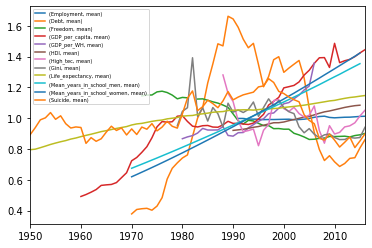

In [8]:
plt.figure()
idx = pd.IndexSlice
Total_dataframe.loc[idx[:, 'mean'],idx[:]].T.plot()
plt.legend(loc=2, prop={'size': 5})



We check that there is no missing data and that the time ranges are the ones expected by the sum-up table, which it is the case.

In [9]:
Sum_up

,First_year,Last_year,Number of countries
Employment,1991,2022,179.0
Debt,1970,2016,122.0
Freedom,1972,2018,193.0
GDP_per_capita,1960,2017,190.0
GDP_per_WH,1980,2006,49.0
HDI,1990,2015,187.0
High_tec,1988,2016,175.0
Gini,1979,2017,160.0
Life_expectancy,1800,2018,187.0
Mean_years_in_school_men,1970,2015,187.0


We can also obseve that there is a data discontinuity on the Freedom index for 1982, which we verify that it is actualy the case!

In [10]:
Total_dataframe.loc[idx['Freedom', :],idx['1982']]

         country    
Freedom  Afghanistan   NaN
         Albania       NaN
         Algeria       NaN
         Andorra       NaN
         Angola        NaN
                        ..
         Yemen         NaN
         Zambia        NaN
         Zimbabwe      NaN
         mean          NaN
         std           NaN
Name: 1982, Length: 195, dtype: float64

We also take a look to the std graphs

<Figure size 432x288 with 0 Axes>

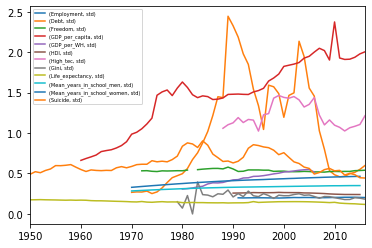

In [11]:
plt.figure()
idx = pd.IndexSlice
Total_dataframe.loc[idx[:, 'std'],idx[:]].T.plot()
plt.legend(loc=2, prop={'size': 5})



Taking into account that the average for all variables is 1, we can see how some variables, like Debt and GDP, have huge standard deviations. This implies that the means are not very representative since there are big diferences between countries. 
This diferences can be seen in then graph below.

<Figure size 432x288 with 0 Axes>

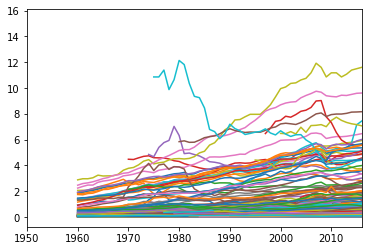

In [12]:
plt.figure()
idx = pd.IndexSlice
Total_dataframe.loc[idx['GDP_per_capita', :],idx[:]].T.plot(legend=None)

This diference can also be seen comparing the mean graph with a given country graph, for example Spain

<Figure size 432x288 with 0 Axes>

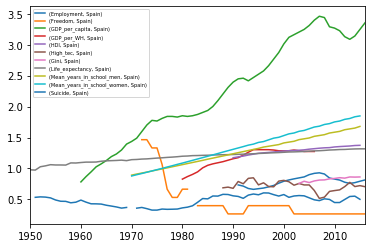

In [13]:
plt.figure()
idx = pd.IndexSlice
Total_dataframe.loc[idx[:, 'Spain'],idx[:]].T.plot()
plt.legend(loc=2, prop={'size': 5})

We now create a dataframe with all means in order to have a correlation matrix

In [14]:
Indicators_mean = Total_dataframe.loc[idx[:,'mean'],idx[:]].T
Indicators_mean

,Employment,Debt,Freedom,GDP_per_capita,GDP_per_WH,HDI,High_tec,Gini,Life_expectancy,Mean_years_in_school_men,Mean_years_in_school_women,Suicide
country,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795801,NaN,NaN,0.893628
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799152,NaN,NaN,0.938981
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.808834,NaN,NaN,0.989815
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819070,NaN,NaN,1.002845
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.829806,NaN,NaN,1.036935
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,1.006523,0.706336,0.883448,1.373462,NaN,1.070379,0.943749,0.862390,1.129273,1.303212,1.361910,0.844064
2013,1.007030,0.739362,0.878617,1.382342,NaN,1.076407,0.950754,0.875214,1.134730,1.320447,1.382121,0.878195
2014,1.009292,0.743783,0.887589,1.400204,NaN,1.081645,0.970382,0.871097,1.138282,1.337490,1.402488,0.809391


we compute the correlation matrix

In [15]:

Indicators_corr = Indicators_mean.corr(method ='pearson') 
Indicators_corr

,,Employment,Debt,Freedom,GDP_per_capita,GDP_per_WH,HDI,High_tec,Gini,Life_expectancy,Mean_years_in_school_men,Mean_years_in_school_women,Suicide
,country,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
,country,,,,,,,,,,,,
Employment,mean,1.000000,-0.833011,-0.591156,0.739363,0.345028,0.766769,-0.266746,-0.786641,0.837303,0.753478,0.753415,-0.888743
Debt,mean,-0.833011,1.000000,-0.232063,0.002270,-0.129125,-0.937157,0.432710,0.468032,0.277050,0.252696,0.245234,0.774012
Freedom,mean,-0.591156,-0.232063,1.000000,-0.852112,-0.824438,-0.862737,0.449458,0.532282,-0.908250,-0.953910,-0.953578,0.130519
GDP_per_capita,mean,0.739363,0.002270,-0.852112,1.000000,0.955797,0.954741,-0.233127,-0.714085,0.963644,0.934393,0.935688,0.040724
GDP_per_WH,mean,0.345028,-0.129125,-0.824438,0.955797,1.000000,0.974215,0.089975,-0.494764,0.878177,0.899936,0.902027,-0.359641
HDI,mean,0.766769,-0.937157,-0.862737,0.954741,0.974215,1.000000,-0.150932,-0.874843,0.984750,0.998436,0.998439,-0.904609
High_tec,mean,-0.266746,0.432710,0.449458,-0.233127,0.089975,-0.150932,1.000000,0.250314,-0.285197,-0.362906,-0.361941,0.296452
Gini,mean,-0.786641,0.468032,0.532282,-0.714085,-0.494764,-0.874843,0.250314,1.000000,-0.688980,-0.668599,-0.669782,0.799473



### Research Question 1: is happiness related with wealth?


We first see which variables are the most correlated with Suicide, which for us is a measure of unhappiness


In [16]:

Indicators_corr['Suicide','mean'].sort_values(ascending=False)
Indicators_corr['Suicide','mean'].abs().sort_values(ascending=False)

                            country
Suicide                     mean       1.000000
HDI                         mean       0.904609
Employment                  mean       0.888743
Gini                        mean       0.799473
Debt                        mean       0.774012
GDP_per_WH                  mean       0.359641
High_tec                    mean       0.296452
Mean_years_in_school_women  mean       0.196161
Life_expectancy             mean       0.194350
Mean_years_in_school_men    mean       0.189187
Freedom                     mean       0.130519
GDP_per_capita              mean       0.040724
Name: (Suicide, mean), dtype: float64


These variables are:

> Gini: inquality is correlated with unhappiness

> Debt: debt is correlated with unhappiness

> HDI: human development is correlated with happiness

> Emplyment: emplyment is correlated with happiness


We plot the aforementioned variables

<Figure size 432x288 with 0 Axes>

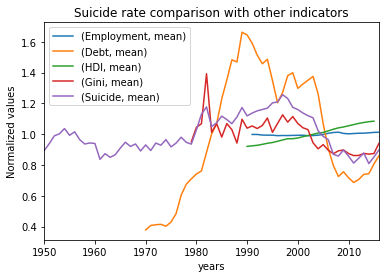

In [30]:
plt.figure()
Plot_list = ['Suicide','Gini','Debt','Employment','HDI']
Total_dataframe.loc[idx[Plot_list,'mean'],idx[:]].T.plot()
plt.title('Suicide rate comparison with other indicators', loc='center')
plt.xlabel("years")
plt.ylabel("Normalized values")
plt.legend()

From the graph, it can be seen a clear correlation between Suicide, Debt and Inequality.

As HDI and Employment cannot be seen clearly, we plot them against the Suicide in a scatter plot so we can have a better representation of the correlation. 

In [40]:
def my_scatter_plot(variable1,variable2):
    plt.figure()
    plt.scatter(Total_dataframe.loc[idx[variable1,'mean'],idx[:]], Total_dataframe.loc[idx[variable2,'mean'],idx[:]])
    plt.title(variable1 + ' vs ' + variable2, loc='center')
    plt.xlabel(variable1)
    plt.ylabel(variable2)

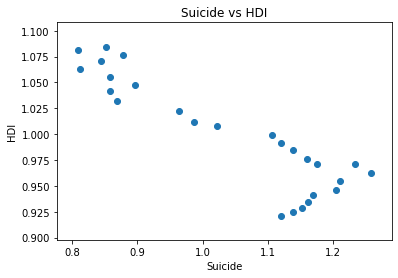

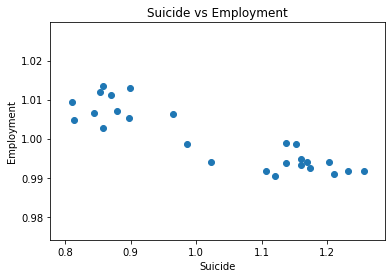

In [41]:
%matplotlib inline

my_scatter_plot('Suicide','HDI')

my_scatter_plot('Suicide','Employment')


With this scatter plots we can see now the correlation

### Research Question 2: are freedom and wealth related?

We first see which variables are the most correlated with Freedom:

In [20]:
Indicators_corr['Freedom','mean'].sort_values(ascending=False)
Indicators_corr['Freedom','mean'].abs().sort_values(ascending=False)

                            country
Freedom                     mean       1.000000
Mean_years_in_school_men    mean       0.953910
Mean_years_in_school_women  mean       0.953578
Life_expectancy             mean       0.908250
HDI                         mean       0.862737
GDP_per_capita              mean       0.852112
GDP_per_WH                  mean       0.824438
Employment                  mean       0.591156
Gini                        mean       0.532282
High_tec                    mean       0.449458
Debt                        mean       0.232063
Suicide                     mean       0.130519
Name: (Freedom, mean), dtype: float64

These variables are:

> Mean_years_in_school_men/women: education is correlated with freedom

> Life expectancy / HDI: the living standards are correlated with freedom

> GDP_per_capita : wealth is correlated with freedom, but not as much as the variable aforementioned


Before plotting, we will peform a linear tranformation to the variable Freedom so it increases with the freedom, in this way it is more intuitive and easier to see in the graph

In [21]:
%matplotlib inline

Total_dataframe.loc[idx['Freedom','mean'],idx[:]] = 2 - Total_dataframe.loc[idx['Freedom','mean'],idx[:]]


Now we plot:

<Figure size 432x288 with 0 Axes>

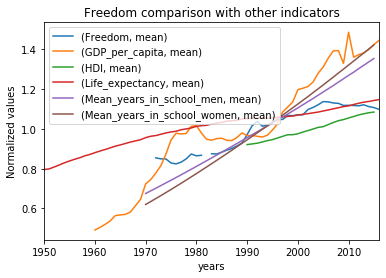

In [37]:
Plot_list = ['Freedom','Mean_years_in_school_men','Mean_years_in_school_women','Life_expectancy','HDI','GDP_per_capita']
plt.figure()
Total_dataframe.loc[idx[Plot_list,'mean'],idx[:]].T.plot()
plt.title('Freedom comparison with other indicators', fontdict=None, loc='center')
plt.xlabel("years")
plt.ylabel("Normalized values")
plt.legend()

We can clearly see how education is the most correlated indicator and how GDP is the least.

To have even a better view on it, we we plot them against the Freedom in a scatter plot.

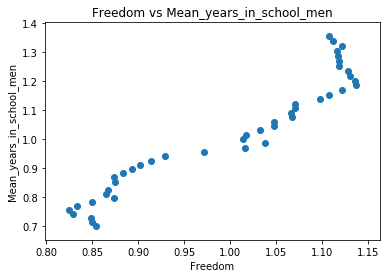

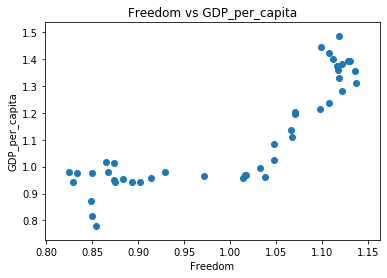

In [42]:

my_scatter_plot('Freedom','Mean_years_in_school_men')

my_scatter_plot('Freedom','GDP_per_capita')

The scatter plots confirm our first impression

<a id='conclusions'></a>
## Conclusions

Although many of the results were expected, we can highlight some not so expected results:

> The suicide rate is more related to education or inequality than wealth (GDP).

> Freedom is very little correlated with suicide rates, not so much with wealth and mostly with education.

Limitations: 

> We have used the means between countries in order to compare indicators. However, as expresed before, some of these indicators have high standard deviations ( like for instance Debt and GDP). This implies that the results found with the means could be not representative for a given country. For instance, even if the mean Freedom and mean GDP are positively corelated, it can happen that for a given country they are negatively or no corelated.

> We have always talked about corelation and not about causation. The reason is that even if we would be tempted to say that inequality causes suicide rate increase, we have not enough evidences since the data have not obtained through a controlled experiment. 